# Model selection

## Libraries

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Load data

In [140]:
# leer data
data_m = pd.read_csv('../../data/processed/data_m_v1.csv')
data_f = pd.read_csv('../../data/processed/data_f_v1.csv')


In [141]:
data_m

,edad,peso,talla,per_brazo_rel,per_brazo_ten,per_antebrazo,per_torax,per_cintura,per_cadera,per_muslo_max,per_muslo_medial,per_pantorrilla,masa_piel,masa_adiposa,masa_muscular,masa_residual,masa_osea
0,-1.036390,-1.129647,-1.041523,-0.245085,-0.364953,-0.791100,-0.661568,-1.015423,-1.182268,-1.117874,-1.535150,-1.224345,3.585589,17.189072,32.433673,7.148282,7.474786
1,-0.425749,-1.106688,0.645564,-1.516202,-2.004565,-1.668563,-2.015216,-1.005378,-0.498441,-1.117874,-1.422207,-0.332794,3.764521,24.290302,25.310796,6.384089,9.142289
2,0.033609,1.495342,-1.424952,3.133412,2.974995,2.718753,1.299323,1.355101,1.642233,2.023883,2.033875,1.681451,4.229962,39.435706,41.820398,11.560786,10.609290
3,-0.378883,0.576979,-0.581408,0.357024,0.788847,0.757365,0.413759,0.551533,0.675956,0.750198,0.633371,1.483329,4.106494,28.820770,38.656728,10.132910,10.732621
4,0.297577,-0.326079,0.338821,0.055969,0.667394,0.602518,-0.092277,-0.000919,-0.394381,-0.948049,-0.518656,-0.762059,3.965215,17.866439,37.797663,9.785320,8.850928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-1.340331,-2.178113,-0.734780,-1.783806,-1.609843,-1.823410,-2.154376,-2.150461,-2.371532,-2.285419,-2.619411,-2.776305,3.280333,12.413889,23.242262,5.378595,7.311850
149,-0.919913,-1.091382,-1.041523,-0.010932,-0.243501,-0.326561,-0.408550,-0.854709,-1.122805,-0.948049,-0.902665,-1.158304,3.596988,16.477752,34.365242,7.527648,7.474786
150,0.968523,0.148409,-0.734780,-0.077832,0.120857,0.137979,0.666777,0.551533,-0.290320,-0.098926,0.249362,-0.002590,3.977372,16.785899,41.176544,10.735525,9.292465
151,1.273154,1.495342,-1.194895,1.795393,1.760468,1.531597,1.742105,2.048177,1.478709,1.068619,0.994792,1.549370,4.258235,29.831738,44.134553,13.106154,11.448103


## Model

In [142]:
x_columns = data_m.columns.drop(['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea'])
y_columns = ['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea']

X_m = data_m[x_columns].values
y_m = data_m[y_columns].values

X_f = data_f[x_columns].values
y_f = data_f[y_columns].values


In [143]:
x_columns

Index(['edad', 'peso', 'talla', 'per_brazo_rel', 'per_brazo_ten',
       'per_antebrazo', 'per_torax', 'per_cintura', 'per_cadera',
       'per_muslo_max', 'per_muslo_medial', 'per_pantorrilla'],
      dtype='object')

## split data 

In [144]:
# Create train/test
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(    
    X_m, y_m, test_size=0.3, random_state=42)

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(    
    X_f, y_f, test_size=0.3, random_state=42)

## Model

### Masc

In [145]:
R2s = []
MAEs = []
model = Ridge(alpha=0.1)
for index,target in enumerate(y_columns):
    model.fit(x_train_m,y_train_m[:,index])

    y_pred = model.predict(x_test_m)
    R2 = r2_score(y_test_m[:,index],y_pred)
    MAE = mean_absolute_error(y_test_m[:,index],y_pred)
    MSE = mean_squared_error(y_test_m[:,index],y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

    print(f'{target}  R2 = {round(R2,3)} and MAE = {round(MAE,3)}')
    print('-'*33)
print('='*33)
print(f'R2 prom = {np.mean(R2s)}')
print(f'MAE prom = {np.mean(MAEs)}')

masa_piel  R2 = 0.998 and MAE = 0.011
---------------------------------
masa_adiposa  R2 = 0.729 and MAE = 2.983
---------------------------------
masa_muscular  R2 = 0.919 and MAE = 1.393
---------------------------------
masa_residual  R2 = 0.932 and MAE = 0.397
---------------------------------
masa_osea  R2 = 0.842 and MAE = 0.466
---------------------------------
R2 prom = 0.8840569201108398
MAE prom = 1.0499176952513831


### Fem

In [146]:
R2s = []
MAEs = []
for index,target in enumerate(y_columns):
    model = Ridge(alpha=0.1)

    model.fit(x_train_f,y_train_f[:,index])

    y_pred = model.predict(x_test_f)
    R2 = r2_score(y_test_f[:,index],y_pred)
    MAE = mean_absolute_error(y_test_f[:,index],y_pred)
    MSE = mean_squared_error(y_test_f[:,index],y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

    print(f'{target}  R2 = {round(R2,3)} and MAE = {round(MAE,3)}')
    print('-'*33)
print('='*33)
print(f'R2 prom = {np.mean(R2s)}')
print(f'MAE prom = {np.mean(MAEs)}')

masa_piel  R2 = 0.997 and MAE = 0.013
---------------------------------
masa_adiposa  R2 = 0.65 and MAE = 3.86
---------------------------------
masa_muscular  R2 = 0.573 and MAE = 2.108
---------------------------------
masa_residual  R2 = 0.934 and MAE = 0.356
---------------------------------
masa_osea  R2 = 0.713 and MAE = 0.495
---------------------------------
R2 prom = 0.7733166800345197
MAE prom = 1.3664215465716498


## Using Grid Search CV

In [162]:
grid_param = {
    'masa_piel': {'alpha': [x/100 for x in range(1,50,1)]},
    'masa_adiposa': {'alpha': [x/10 for x in range(1,25,1)]},   
    'masa_muscular': {'alpha': [x/10 for x in range(5,25,1)]},
    'masa_residual': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_osea': {'alpha': [x/10 for x in range(15,55,1)]}
}

### masc

In [163]:
alphas_m = dict()
model = Ridge()
for index,target in enumerate(y_columns):
    gd_sr = GridSearchCV(estimator=model,
                        param_grid=grid_param[target],
                        scoring='r2',
                        cv=4,
                        n_jobs=-1)
    gd_sr.fit(x_train_m,y_train_m[:,index])
    best_parameters = gd_sr.best_params_
    print(target)
    print(f'Best R2: {gd_sr.best_score_}')
    print(best_parameters)
    y_pred = gd_sr.predict(x_test_m)
    R2 = r2_score(y_test_m[:,index],y_pred)
    print(f'Test R2: {R2}')
    print('-'*33)
    alphas_m[target]=best_parameters['alpha']


masa_piel
Best R2: 0.9972710764611215
{'alpha': 0.05}
Test R2: 0.9977986633563954
---------------------------------
masa_adiposa
Best R2: 0.6649335395494709
{'alpha': 0.2}
Test R2: 0.7285957777116099
---------------------------------
masa_muscular
Best R2: 0.9136866104952438
{'alpha': 0.7}
Test R2: 0.9179664469535875
---------------------------------
masa_residual
Best R2: 0.9380713416750179
{'alpha': 1.5}
Test R2: 0.9374404214159511
---------------------------------
masa_osea
Best R2: 0.7945542412134027
{'alpha': 4.6}
Test R2: 0.8283694222590926
---------------------------------


In [164]:
alphas_m

{'masa_piel': 0.05,
 'masa_adiposa': 0.2,
 'masa_muscular': 0.7,
 'masa_residual': 1.5,
 'masa_osea': 4.6}

### fem

In [165]:
grid_param = {
    'masa_piel': {'alpha': [x/100 for x in range(1,50,1)]},
    'masa_adiposa': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_muscular': {'alpha': [x/10 for x in range(15,55,1)]},
    'masa_residual': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_osea': {'alpha': [x/10 for x in range(15,55,1)]}
}

In [166]:
alphas_f = dict()
model = Ridge()
for index,target in enumerate(y_columns):
    gd_sr = GridSearchCV(estimator=model,
                        param_grid=grid_param[target],
                        scoring='r2',
                        cv=4,
                        n_jobs=-1)
    gd_sr.fit(x_train_f,y_train_f[:,index])
    best_parameters = gd_sr.best_params_
    print(target)
    print(f'Best R2: {gd_sr.best_score_}')
    print(best_parameters)
    y_pred = gd_sr.predict(x_test_f)
    R2 = r2_score(y_test_f[:,index],y_pred)
    print(f'Test R2: {R2}')
    print('-'*33)
    alphas_f[target]=best_parameters['alpha']


masa_piel
Best R2: 0.9966782762534551
{'alpha': 0.03}
Test R2: 0.9971980150132066
---------------------------------
masa_adiposa
Best R2: 0.7726490167104801
{'alpha': 2.2}
Test R2: 0.6593763706271485
---------------------------------
masa_muscular
Best R2: 0.7962180532052219
{'alpha': 1.5}
Test R2: 0.589651359247626
---------------------------------
masa_residual
Best R2: 0.8844843023792847
{'alpha': 2.1}
Test R2: 0.9365315267896718
---------------------------------
masa_osea
Best R2: 0.8364934182646211
{'alpha': 1.5}
Test R2: 0.7187505992825758
---------------------------------


In [167]:
alphas_f

{'masa_piel': 0.03,
 'masa_adiposa': 2.2,
 'masa_muscular': 1.5,
 'masa_residual': 2.1,
 'masa_osea': 1.5}

## Using CV

### masc

In [168]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    scores = cross_val_score(model, x_train_m,y_train_m[:,index], cv=4)
    print(target)
    print(scores)
    print(scores.mean())
    print(scores.std())

masa_piel
[0.99682032 0.99727259 0.99722367 0.99776773]
0.9972710764611215
0.0003361920394900186
masa_adiposa
[0.59637653 0.67029867 0.72499018 0.66806877]
0.6649335395494709
0.045676792228201535
masa_muscular
[0.92637413 0.91647523 0.89546714 0.91642993]
0.9136866104952438
0.011271916096989522
masa_residual
[0.96026172 0.93100825 0.91554326 0.94547214]
0.9380713416750179
0.016617660225771366
masa_osea
[0.8193374  0.83500905 0.77279759 0.75107293]
0.7945542412134027
0.033966060154373305


### fem

In [169]:
for index,target in enumerate(y_columns):
    model = Ridge(alphas_f[target])
    scores = cross_val_score(model, x_train_f,y_train_f[:,index], cv=4)
    print(target)
    print(scores)
    print(scores.mean())
    print(scores.std())

masa_piel
[0.99849294 0.99577406 0.99704519 0.99540091]
0.9966782762534551
0.0012121175257065802
masa_adiposa
[0.7537052  0.58585986 0.84418318 0.90684783]
0.7726490167104801
0.12080512601023997
masa_muscular
[0.83783326 0.82959424 0.67193921 0.8455055 ]
0.7962180532052219
0.07197269956928798
masa_residual
[0.91510218 0.91120365 0.83092914 0.88070224]
0.8844843023792847
0.03366688920342635
masa_osea
[0.84560625 0.78254205 0.8598703  0.85795508]
0.8364934182646211
0.031626237777741165


### Plotting  values vs  predictions

#### masc

##### y_train vs y_train_pred

masa_piel
R2 = 0.9983 , MSE = 0.0002 and MAE = 0.0091
masa_adiposa
R2 = 0.792 , MSE = 10.4344 and MAE = 2.4156
masa_muscular
R2 = 0.9443 , MSE = 2.1514 and MAE = 1.0811
masa_residual
R2 = 0.9583 , MSE = 0.1671 and MAE = 0.3196
masa_osea
R2 = 0.8355 , MSE = 0.3113 and MAE = 0.4412


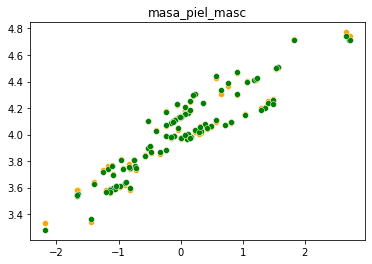

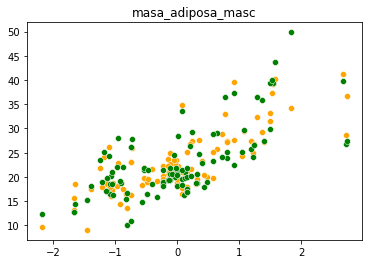

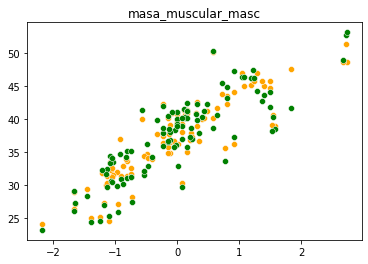

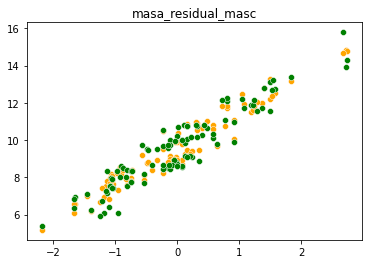

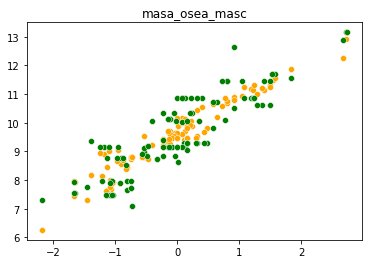

In [170]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    model.fit(x_train_m,y_train_m[:,index])

    y_pred = model.predict(x_train_m)
    MSE = mean_squared_error(y_train_m[:,index],y_pred)
    MAE = mean_absolute_error(y_train_m[:,index],y_pred)
    R2 = r2_score(y_train_m[:,index],y_pred)
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_train_m[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_train_m[:,1],y=y_pred, color='orange')
    sns.scatterplot(x=x_train_m[:,1],y=y_train_m[:,index], color='green')
    plt.title(target+'_masc')
    
    

##### y_test vs y_test_pred

masa_piel
R2 = 0.9986 , MSE = 0.0002 and MAE = 0.0092
masa_adiposa
R2 = 0.8614 , MSE = 7.8287 and MAE = 2.2532
masa_muscular
R2 = 0.9481 , MSE = 1.925 and MAE = 1.1386
masa_residual
R2 = 0.9562 , MSE = 0.1656 and MAE = 0.297
masa_osea
R2 = 0.8842 , MSE = 0.2366 and MAE = 0.4138


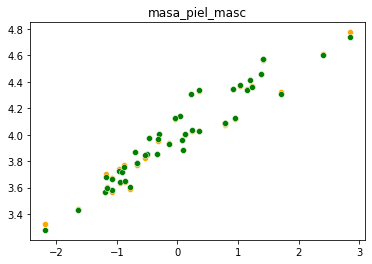

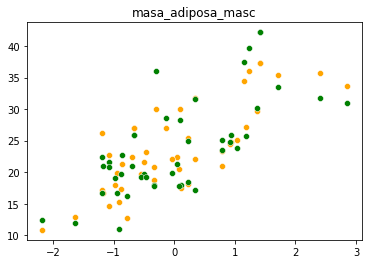

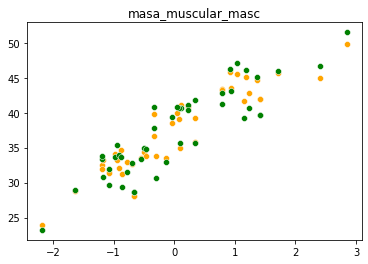

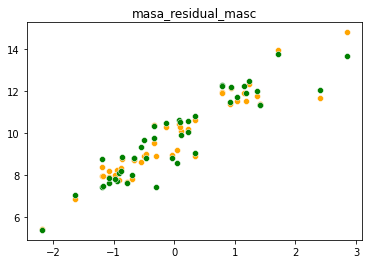

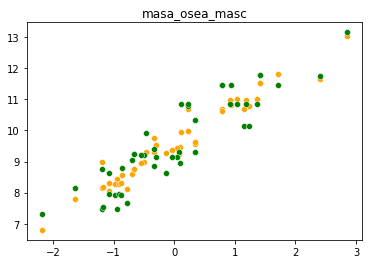

In [171]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    model.fit(x_test_m,y_test_m[:,index])

    y_pred = model.predict(x_test_m)
    MSE = mean_squared_error(y_test_m[:,index],y_pred)
    MAE = mean_absolute_error(y_test_m[:,index],y_pred)
    R2 = r2_score(y_test_m[:,index],y_pred)
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_test_m[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_test_m[:,1],y=y_pred, color='orange')
    sns.scatterplot(x=x_test_m[:,1],y=y_test_m[:,index], color='green')
    plt.title(target+'_masc')
    

#### fem

##### y_train vs y_train_pred

masa_piel
R2 = 0.9978 , MSE = 0.0003 and MAE = 0.0119
masa_adiposa
R2 = 0.859 , MSE = 10.0878 and MAE = 2.3356
masa_muscular
R2 = 0.8677 , MSE = 2.6518 and MAE = 1.2506
masa_residual
R2 = 0.9125 , MSE = 0.3305 and MAE = 0.3952
masa_osea
R2 = 0.8813 , MSE = 0.1831 and MAE = 0.3359


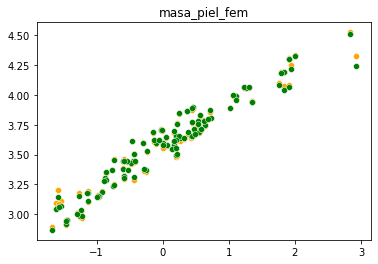

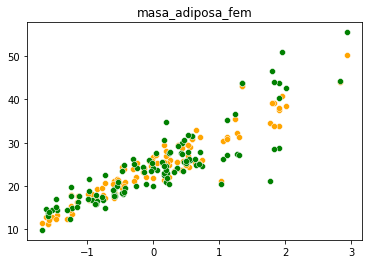

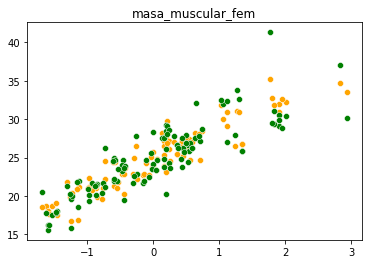

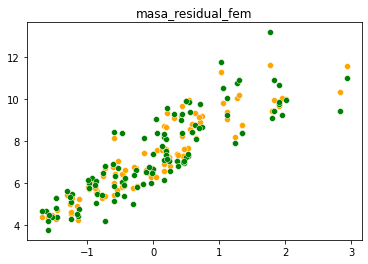

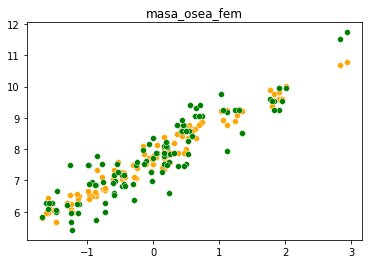

In [172]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_f[target])
    model.fit(x_train_f,y_train_f[:,index])

    y_pred = model.predict(x_train_f)
    MSE = mean_squared_error(y_train_f[:,index],y_pred)
    MAE = mean_absolute_error(y_train_f[:,index],y_pred)
    R2 = r2_score(y_train_f[:,index],y_pred)
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_train_f[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_train_f[:,1],y=y_pred, color='orange')
    sns.scatterplot(x=x_train_f[:,1],y=y_train_f[:,index], color='green')
    plt.title(target+'_fem')

##### y_test vs y_test_pred

masa_piel
R2 = 0.9988 , MSE = 0.0001 and MAE = 0.0098
masa_adiposa
R2 = 0.8076 , MSE = 15.2596 and MAE = 3.025
masa_muscular
R2 = 0.8035 , MSE = 3.4738 and MAE = 1.563
masa_residual
R2 = 0.9536 , MSE = 0.165 and MAE = 0.3288
masa_osea
R2 = 0.7698 , MSE = 0.3 and MAE = 0.4532


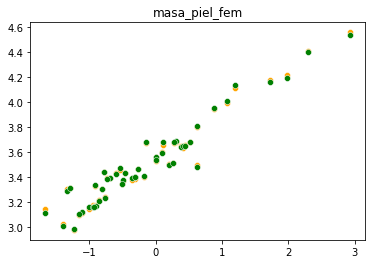

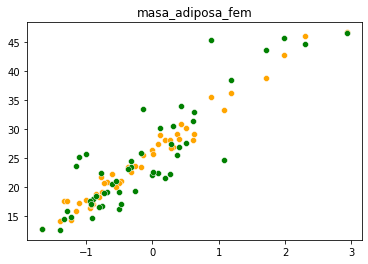

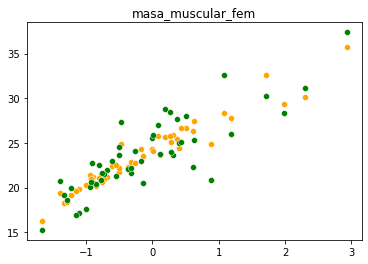

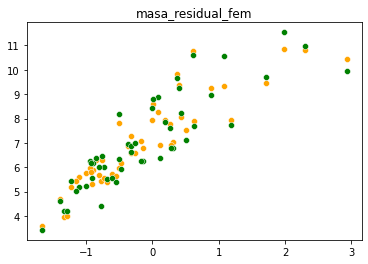

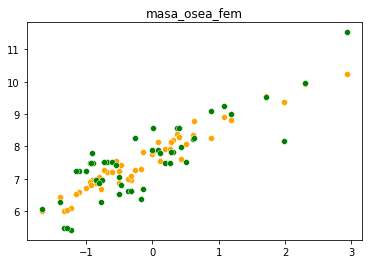

In [173]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_f[target])
    model.fit(x_test_f,y_test_f[:,index])

    y_pred = model.predict(x_test_f)
    MSE = mean_squared_error(y_test_f[:,index],y_pred)
    MAE = mean_absolute_error(y_test_f[:,index],y_pred)
    R2 = r2_score(y_test_f[:,index],y_pred)
    print(f'{target}')
    print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
    plt.figure()
    #sns.scatterplot(x=y_test_f[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_test_f[:,1],y=y_pred, color='orange')
    sns.scatterplot(x=x_test_f[:,1],y=y_test_f[:,index], color='green')
    plt.title(target+'_fem')

### Comparing total weight vs predicted total weight

#### masc

In [194]:
mean_m = pd.read_csv('../../data/interim/mean_m.csv').set_index('Unnamed: 0')['0']
std_m = pd.read_csv('../../data/interim/std_m.csv').set_index('Unnamed: 0')['0']

R2 = 0.8904 , MSE = 21.3669 and MAE = 3.7989


Text(0.5, 1.0, 'Peso real vs peso calculado')

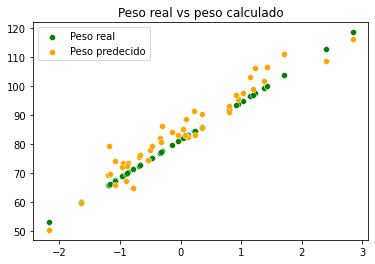

In [199]:
peso_pred = list(np.zeros(len(y_test_m[:,0])))
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    model.fit(x_test_m,y_test_m[:,index])

    y_pred = model.predict(x_test_m)
    peso_pred = [peso_pred[i] + y_pred[i] for i in range(len(peso_pred))]  

peso_original = x_test_m[:,1]*std_m.peso + mean_m.peso

MSE = mean_squared_error(peso_original,peso_pred)
MAE = mean_absolute_error(peso_original,peso_pred)
R2 = r2_score(peso_original,peso_pred)
print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
plt.figure()
#sns.scatterplot(x=y_test_m[:,index],y=y_pred, color='blue')

sns.scatterplot(x=x_test_m[:,1],y=peso_original, color='green')
sns.scatterplot(x=x_test_m[:,1],y=peso_pred, color='orange')
plt.legend(['Peso real', 'Peso predecido'])
plt.title('Peso real vs peso calculado')

#### fem

R2 = 0.9733 , MSE = 4.4195 and MAE = 1.7233


Text(0.5, 1.0, 'Peso real vs peso calculado')

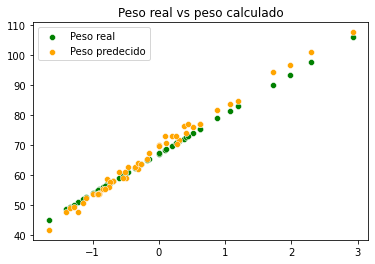

In [200]:
mean_f = pd.read_csv('../../data/interim/mean_f.csv').set_index('Unnamed: 0')['0']
std_f = pd.read_csv('../../data/interim/std_f.csv').set_index('Unnamed: 0')['0']

peso_pred = list(np.zeros(len(y_test_f[:,0])))

for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_f[target])
    model.fit(x_test_f,y_test_f[:,index])

    y_pred = model.predict(x_test_f)
    peso_pred = [peso_pred[i] + y_pred[i] for i in range(len(peso_pred))]  

peso_original = x_test_f[:,1]*std_f.peso + mean_f.peso

MSE = mean_squared_error(peso_original,peso_pred)
MAE = mean_absolute_error(peso_original,peso_pred)
R2 = r2_score(peso_original,peso_pred)
print(f'R2 = {round(R2,4)} , MSE = {round(MSE,4)} and MAE = {round(MAE,4)}')
plt.figure()
#sns.scatterplot(x=y_test_f[:,index],y=y_pred, color='blue')

sns.scatterplot(x=x_test_f[:,1],y=peso_original, color='green')
sns.scatterplot(x=x_test_f[:,1],y=peso_pred, color='orange')
plt.legend(['Peso real', 'Peso predecido'])
plt.title('Peso real vs peso calculado')